In [383]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob

In [15]:
df_exp = pd.read_csv('rachaExpData.csv').iloc[:,1:]

In [391]:
df_exp

,Mutant population,WT population,Frequency,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9
0,1,1000,0.000999,0,0,0,0,0,0,0,0,1
1,10,1000,0.009901,1,0,0,0,1,1,1,1,0
2,100,1000,0.090909,2,1,2,2,2,1,2,2,1
3,200,1000,0.166667,2,6,3,2,5,2,5,0,1
4,500,1000,0.333333,6,5,6,7,5,5,5,4,6
5,1000,1000,0.500000,9,10,9,9,8,8,10,9,8
6,2000,1000,0.666667,11,9,7,8,7,12,10,7,10
7,5000,1000,0.833333,fix,fix,fix,fix,fix,fix,fix,fix,fix
8,10000,1000,0.909091,fix,fix,fix,fix,fix,fix,fix,fix,fix


Text(0, 0.5, 'Sectors')

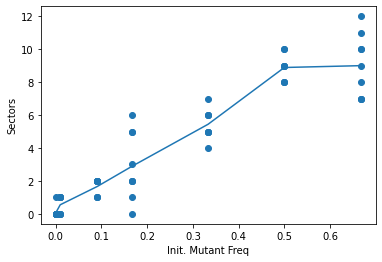

In [395]:
fig,ax=plt.subplots()
ax.scatter(np.repeat([df_exp['Frequency'].values[:-2]],9,axis=0),
            df_exp.values[:-2,3:].astype(int).T)

ax.plot(df_exp['Frequency'].values[:-2],np.mean(df_exp.values[:-2,3:].astype(int).T,axis=0 ))
ax.set_xlabel('Init. Mutant Freq')

ax.set_ylabel('Sectors')

In [385]:

df_sim = pd.read_csv('simData.csv').iloc[:,1:]
df_sim

,B,Initial Mutant Population,ID,Sectors,Unnamed: 5,Unnamed: 6
0,1.0,25,0,4.0,NaN,NaN
1,1.0,25,1,NaN,NaN,NaN
2,1.0,25,2,NaN,NaN,NaN
3,1.0,25,3,NaN,NaN,NaN
4,1.0,25,4,NaN,NaN,NaN
...,...,...,...,...,...,...
415,4.0,175,5,NaN,NaN,NaN
416,4.0,175,6,NaN,NaN,NaN
417,4.0,175,7,NaN,NaN,NaN
418,4.0,175,8,NaN,NaN,NaN


In [399]:
df['B']

0      1.0
10     1.0
20     1.0
30     1.0
70     2.0
80     2.0
90     2.0
100    2.0
140    2.5
150    2.5
160    2.5
170    2.5
210    3.0
220    3.0
230    3.0
240    3.0
280    3.5
290    3.5
300    3.5
310    3.5
Name: B, dtype: object

[Text(0, 0, '0.1'),
 Text(0, 0, '0.15'),
 Text(0, 0, '0.2'),
 Text(0, 0, '0.25'),
 Text(0, 0, '0.3'),
 Text(0, 0, '0.35'),
 Text(0, 0, '0.4'),
 Text(0, 0, '0.45'),
 Text(0, 0, '0.5')]

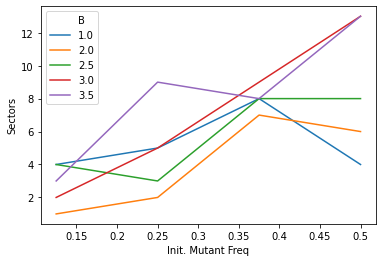

In [450]:
fig,ax=plt.subplots()
df = df_sim.loc[df_sim['ID']==0,:]
df= df.loc[df['B']<4,:]
df['B']=df['B'].astype('category')
df=df.loc[df['Initial Mutant Population']<125,:]
sns.lineplot(x='Initial Mutant Population',y='Sectors',data=df,hue='B',ax=ax)
ax.set_xlabel('Init. Mutant Freq')
ax.set_xticklabels(np.array([20,30,40,50,60,70,80,90,100])/200)

In [442]:
proff = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/pushed_waves/2d_pushed_waves/sim_data/prof*B4*U125*I1*')

nDemes = 700

In [443]:
arr = np.loadtxt(proff[0])


In [444]:
popArr = arr[:,2:].reshape((nDemes,nDemes,2))

In [445]:
wtArr = popArr[:,:,0]
mutArr= popArr[:,:,1]


In [446]:
freqArr = wtArr /( wtArr+mutArr)

<ipython-input-446-137e27fd3023>:1: RuntimeWarning: invalid value encountered in true_divide
  freqArr = wtArr /( wtArr+mutArr)


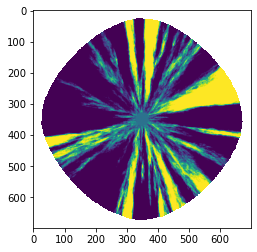

In [447]:
plt.imshow(freqArr)

In [9]:
700*700

490000

In [8]:
import sys
sys.setrecursionlimit(100000)

In [9]:
def floodfill(matrix, x, y,val):
    
    #"hidden" stop clause - not reinvoking for "c" or "b", only for "a".
    
    if matrix[x][y] == val :  
        matrix[x][y] = "-1" 
        #recursively invoke flood fill on all surrounding cells:
        if x > 0:
            floodfill(matrix,x-1,y,val)
        if x < len(matrix[y]) - 1:
            floodfill(matrix,x+1,y,val)
        if y > 0:
            floodfill(matrix,x,y-1,val)
        if y < len(matrix) - 1:
            floodfill(matrix,x,y+1,val)
            
    return matrix

In [10]:
binArr = np.copy(freqArr)
binArr[binArr>=.6] = 1
binArr[binArr<.6] = 0

<ipython-input-10-c93603e63473>:2: RuntimeWarning: invalid value encountered in greater_equal
  binArr[binArr>=.6] = 1
<ipython-input-10-c93603e63473>:3: RuntimeWarning: invalid value encountered in less
  binArr[binArr<.6] = 0


In [ ]:
floodfill(binArr,200,200, binArr[200,200])

In [164]:
genotypes = np.unique(binArr)[~np.isnan(np.unique(binArr))]
    

In [174]:
inds = np.where(binArr==0)
    

In [177]:
np.random.choice(len(inds[0]))

4748

In [181]:
def sectorCount(binArr):
    sects=0
    genotypes = np.unique(binArr)[~np.isnan(np.unique(binArr))]
    while len(genotypes>1):
        genPick =np.random.choice(genotypes[genotypes!=-1])
        inds = np.where(binArr==0)
        indPick1 =inds[0][np.random.choice(len(inds[0]))]
        indPick2 = inds[1][np.random.choice(len(inds[1]))]
        binArr = floodfill(binArr,indPick1,indPick2,binArr[indPick1,indPick2])
        sects+=1
    
        

In [182]:
sectorCount(binArr)

RecursionError: maximum recursion depth exceeded in comparison

In [ ]:
inds